## Tutorial będący skrótem wykładu 

### DataFrames

- Zaawansowany pakiet do działania na tabelkach nxm danych 
- Podobne do pandas DataFrames w Pythonie albo data.frame w R
- Specjalistyczne funkcje do statystyki
- należy zaistalować pakiety:

```julia
Pkg.add("DataFrames")
Pkg.add("DataArrays")
Pkg.add("RDatasets")```

- DataFrame to rodzaj bazy danych in-memory
- Składa się z kolumn, do których odwołujemy się używając symboli
- Każda z kolumn jest typu DataArrays, który jest  parametryzowany typem przechowywanym w tej kolumnie 
- typ ten może być inny w każdej kolumnie (inaczej niż w dwuwymiarowych tablicach )
- strona pakietu: https://github.com/JuliaStats/DataFrames.jl
- dokumentacja https://dataframesjl.readthedocs.io/en/latest/introduction.html
- http://juliastats.github.io/DataFrames.jl/


In [1]:
# wsparcie dla nieistniejących wartości - NA
# wartość NA, typ NAtype

using DataArrays 
using DataFrames
dv=@data([7,3,NA,5,42])


5-element DataArrays.DataArray{Int64,1}:
  7  
  3  
   NA
  5  
 42  

In [2]:
# funkcja drop NA czyli dropna()
sum(dropna(dv))

57

In [3]:
using DataFrames
df1=DataFrame()
df1[:MojaKolumna]= 1:4
df1[:Col2]= [e,pi,sqrt(2), 42]
df1[:Col3]= [true,false, true, false]
show(df1)

4×3 DataFrames.DataFrame
│ Row │ MojaKolumna │ Col2    │ Col3  │
├─────┼─────────────┼─────────┼───────┤
│ 1   │ 1           │ 2.71828 │ true  │
│ 2   │ 2           │ 3.14159 │ false │
│ 3   │ 3           │ 1.41421 │ true  │
│ 4   │ 4           │ 42.0    │ false │

In [4]:
typeof(df1[:Col3])

DataArrays.DataArray{Bool,1}

In [5]:
# możemy też utworzyć DataFrame używając konstruktora
df2=DataFrame(MojaKolumna=1:10, 
    Col2=[e,pi, sqrt(2), 3, 4,e,pi, sqrt(2), 3, 4], 
    Col3=[true,true,false,true,false,true,true,false,true,false])

,MojaKolumna,Col2,Col3
1,1,2.718281828459045,true
2,2,3.141592653589793,true
3,3,1.4142135623730951,false
4,4,3.0,true
5,5,4.0,false
6,6,2.718281828459045,true
7,7,3.141592653589793,true
8,8,1.4142135623730951,false
9,9,3.0,true
10,10,4.0,false


In [6]:
# można odwoływać się po indeksie
show(df2[2])

[2.71828, 3.14159, 1.41421, 3.0, 4.0, 2.71828, 3.14159, 1.41421, 3.0, 4.0]

In [7]:
# albo po symbolu kolumny
show(df2[:Col2])

[2.71828, 3.14159, 1.41421, 3.0, 4.0, 2.71828, 3.14159, 1.41421, 3.0, 4.0]

In [8]:
# wiersze lub podzbiory wierszy i kolumn uzyskujemy poprzez operator (:). Wynikiem jest nowy DataFrame
show(df2[3,:])

1×3 DataFrames.DataFrame
│ Row │ MojaKolumna │ Col2    │ Col3  │
├─────┼─────────────┼─────────┼───────┤
│ 1   │ 3           │ 1.41421 │ false │

In [9]:
# drugi i trzeci wiersz
df2[2:3, :]

,MojaKolumna,Col2,Col3
1,2,3.141592653589793,true
2,3,1.4142135623730951,false


In [10]:
# druga kolumna drugiego i trzeciego wiersza
df2[2:3, :Col2]

2-element DataArrays.DataArray{Float64,1}:
 3.14159
 1.41421

In [11]:
# druga i trzecia kolumna drugiego i trzeciego wiersza
df2[2:3,[:Col2, :Col3]]

,Col2,Col3
1,3.141592653589793,true
2,1.4142135623730951,false


In [12]:
# pierwsze sześć wierszy
DataFrames.head(df2)

,MojaKolumna,Col2,Col3
1,1,2.718281828459045,true
2,2,3.141592653589793,true
3,3,1.4142135623730951,false
4,4,3.0,true
5,5,4.0,false
6,6,2.718281828459045,true


In [13]:
# ostatnie sześć wierszy
DataFrames.tail(df2)

,MojaKolumna,Col2,Col3
1,5,4.0,false
2,6,2.718281828459045,true
3,7,3.141592653589793,true
4,8,1.4142135623730951,false
5,9,3.0,true
6,10,4.0,false


In [14]:
# nazwy kolumn
names(df2)

3-element Array{Symbol,1}:
 :MojaKolumna
 :Col2       
 :Col3       

In [15]:
# typy kolumn
eltypes(df2)

3-element Array{Type,1}:
 Int64  
 Float64
 Bool   

In [16]:
# podstawowe dane statystyczne o wartościach w kolumnie
describe(df2)

MojaKolumna
Summary Stats:
Mean:           5.500000
Minimum:        1.000000
1st Quartile:   3.250000
Median:         5.500000
3rd Quartile:   7.750000
Maximum:        10.000000
Length:         10
Type:           Int64
Number Missing: 0
% Missing:      0.000000

Col2
Summary Stats:
Mean:           2.854818
Minimum:        1.414214
1st Quartile:   2.718282
Median:         3.000000
3rd Quartile:   3.141593
Maximum:        4.000000
Length:         10
Type:           Float64
Number Missing: 0
% Missing:      0.000000

Col3
Summary Stats:
Mean:           0.600000
Minimum:        0.000000
1st Quartile:   0.000000
Median:         1.000000
3rd Quartile:   1.000000
Maximum:        1.000000
Length:         10
Type:           Bool
Number Missing: 0
% Missing:      0.000000



In [17]:
mean(df2[:MojaKolumna])

5.5

In [18]:
std(df2[:MojaKolumna])

3.0276503540974917

In [19]:
# posortowane wartości w kolumnie Col2 (bez powtórzeń)
sort(unique(df2[:Col2]))

5-element DataArrays.DataArray{Float64,1}:
 1.41421
 2.71828
 3.0    
 3.14159
 4.0    

In [20]:
# zwraca tablice typu Boolean  w zależności od spełnianego warunku
df2[:Col3] .== true

10-element DataArrays.DataArray{Bool,1}:
  true
  true
 false
  true
 false
  true
  true
 false
  true
 false

In [21]:
#Zwraca podzbiór dla wierszy spełniających warunek
df2[df2[:Col3] .== true, :]

,MojaKolumna,Col2,Col3
1,1,2.718281828459045,true
2,2,3.141592653589793,true
3,4,3.0,true
4,6,2.718281828459045,true
5,7,3.141592653589793,true
6,9,3.0,true


In [22]:
# grupowanie wierszy (tutaj po wartosci Col3)
# ostatni argument to funkcja albo wyrażenie 
by(df2, :Col3, x->x)

,Col3,MojaKolumna,Col2,Col3_1
1,false,3,1.4142135623730951,false
2,false,5,4.0,false
3,false,8,1.4142135623730951,false
4,false,10,4.0,false
5,true,1,2.718281828459045,true
6,true,2,3.141592653589793,true
7,true,4,3.0,true
8,true,6,2.718281828459045,true
9,true,7,3.141592653589793,true
10,true,9,3.0,true


In [23]:
# zliczanie ilosci win pogrupowanych po jakości
by(df2, :Col3, x->size(x,1))

,Col3,x1
1,false,4
2,true,6



### Graficzna reprezentacja DataFrames

Do wyświetlania danych statystycznych dobrym wyborem jest pakiet Gadfly

```julia
Pkg.add("Gadfly")
```

- koncepcja wzięta z pakietu ggplot2 dla języka R 
- bazuje na książce Leland Wilkinson's "The Grammar of Graphics".
- http://gadflyjl.org/stable/index.html

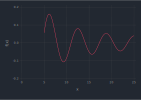

In [24]:
using Gadfly
pl=plot([x-> cos(x)/x], 5, 25)

In [6]:
using Gadfly, DataFrames
df4=readtable("medical.csv")
print("size is ", size(df4))
df4[1:3, 1:size(df4,2)]

size is (50, 7)

,Numer,Płeć,Wiek,sBP,dBP,Drink,BMI
1,0,1,39,106.0,70.0,0,26.97
2,1,2,46,121.0,81.0,0,28.73
3,2,1,48,127.5,80.0,1,25.34


In [7]:
df4[:Płeć]= ifelse.(df4[:Płeć].==1, "M", "K")
df4[:Drink]= ifelse.(df4[:Drink].==1, "T", "N")
df4[1:3, 1:size(df4,2)]


,Numer,Płeć,Wiek,sBP,dBP,Drink,BMI
1,0,M,39,106.0,70.0,N,26.97
2,1,K,46,121.0,81.0,N,28.73
3,2,M,48,127.5,80.0,T,25.34


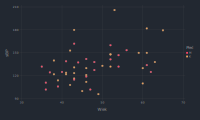

In [10]:
# wykres skórczowego ciśnienia krwi - systolic blood preassure (sBP)
# w zależności od wieku
# z podziałem wg płci
#
set_default_plot_size(20cm, 12cm)
plot(df4, x="Wiek", y="sBP", color="Płeć")


  likely near In[9]:5


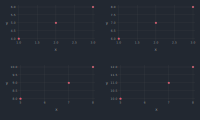

  likely near In[9]:5
in render at C:\Applications\JuliaPro\pkgs-0.6.0.1\v0.6\Gadfly\src\geom/point.jl
  likely near C:\Applications\JuliaPro\pkgs-0.6.0.1\v0.6\IJulia\src\kernel.jl:31
  likely near C:\Applications\JuliaPro\pkgs-0.6.0.1\v0.6\IJulia\src\kernel.jl:31
  likely near C:\Applications\JuliaPro\pkgs-0.6.0.1\v0.6\IJulia\src\kernel.jl:31
  likely near C:\Applications\JuliaPro\pkgs-0.6.0.1\v0.6\IJulia\src\kernel.jl:31
  likely near C:\Applications\JuliaPro\pkgs-0.6.0.1\v0.6\IJulia\src\kernel.jl:31
  likely near C:\Applications\JuliaPro\pkgs-0.6.0.1\v0.6\IJulia\src\kernel.jl:31
  likely near C:\Applications\JuliaPro\pkgs-0.6.0.1\v0.6\IJulia\src\kernel.jl:31
  likely near C:\Applications\JuliaPro\pkgs-0.6.0.1\v0.6\IJulia\src\kernel.jl:31
  likely near C:\Applications\JuliaPro\pkgs-0.6.0.1\v0.6\IJulia\src\kernel.jl:31
  likely near C:\Applications\JuliaPro\pkgs-0.6.0.1\v0.6\IJulia\src\kernel.jl:31
  likely near C:\Applications\JuliaPro\pkgs-0.6.0.1\v0.6\IJulia\src\kernel.jl:31
  like

In [9]:
# układanie wykresów w "tabelki" wykresów
using Gadfly
p1 = plot(x=[1,2,3], y=[4,5,6])
p2 = plot(x=[1,2,3], y=[6,7,8])
vstack(p1,p2)

p3 = plot(x=[5,7,8], y=[8,9,10])
p4 = plot(x=[5,7,8], y=[10,11,12])

# to jest to samo
vstack(hstack(p1,p2),hstack(p3,p4))
gridstack([p1 p2; p3 p4])

